# 특성 공학과 규제

## 데이터 준비

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()  # df를 np array로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

- cf) 넘파이 튜토리얼: https://ml-ko.kr/homl2/tools_numpy.html
- cf) 판다스 튜토리얼: https://ml-ko.kr/homl2/tools_pandas.html

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

## LinearRegression

## 사이킷런의 변환기
- 변환기(Transformer): 특성을 만들거나 전처리하기 위한 클래스
  - fit(), transform() 메서드 제공
  - 이 둘을 합친 fit_transform() 메서드도 있음
- cf) 딥러닝의 Transformer 구조와 전혀 상관없음
- cf) 추정기(Estimator): LinearRegression, KNN 등처럼 변환기 외에 모델링하는 것들을 통칭
  - fit(), predict(), score() 메서드 제공

### Polynomial Regression
- 비선형(non-linear) 데이터를 학습하는데 선형 모델을 사용할 수 있게 해줌
- 기존 데이터의 feature가 여러 개일 때 feature 간의 관계를 찾을 수 있음<br>
cf) https://box-world.tistory.com/52

#### 다항 특성 만들기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#### model.fit()한 후에 model.transform()을 사용할 수 있음

In [ ]:
# degree=2 디폴트
model = PolynomialFeatures()
model.fit([[2, 3]])

# 1(편향 / 절편, bias), 2(특성1), 3(특성2), 2**2(특성1**2), 2*3(특성1*특성2), 3**2(특성2**2)
print(model.transform([[2, 3]]))

# cf) fit()와 transform()을 model.fit_transform()으로 한 번에 쓸 수 있음

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# LinearRegression 클래스(모델)는 bias를 자동으로 추가하므로 굳이 bias를 생성하지 않음
# bias를 추가하더라도 무시하기때문에 상관없지만 혼돈을 피하기 위해 명시적으로 include_bias=False를 사용
model = PolynomialFeatures(include_bias=False)
model.fit([[2, 3]])
print(model.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


#### 코드 적용

In [ ]:
# degree=2 디폴트
model = PolynomialFeatures(include_bias=False)

model.fit(x_train)
train_poly = model.transform(x_train)

In [ ]:
print(x_train.shape, train_poly.shape)

(42, 3) (42, 9)


In [ ]:
model.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = model.transform(x_test)

#### 다중 회귀(multiple / multinomial regression) 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_poly, y_train)
print(model.score(train_poly, y_train))

0.9903183436982124


In [ ]:
print(model.score(test_poly, y_test))

0.9714559911594134


#### 더 많은 특성 만들기

In [ ]:
# degree=2가 디폴트
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)

In [ ]:
print(train_poly.shape)

(42, 55)


- 특성의 개수를 크게 늘리면 선형모델은 아주 강력해짐.
- 훈련 세트에 대해 거의 완벽하게 학습이 가능하지만 과대적합이 발생.

In [ ]:
model.fit(train_poly, y_train)
print(model.score(train_poly, y_train))

0.9999999999991097


In [ ]:
print(model.score(test_poly, y_test))

-144.40579242684848


## 규제
- 과대적합을 방지함
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 가중치(기울기))의 크기를 작게 만드는 일
  - 대표적으로 릿지 회귀와 라쏘 회귀가 있음
- 먼저 정규화를 해야함
  - 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않기 때문

### 규제 전 정규화 - StandardScaler 클래스
- 정규화
- 변환기(Transformer) 중 하나
  - fit(), transform(), fit_transform()

In [ ]:
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
model.fit(train_poly)  # 각 특성마다 표준편차를 구함

train_scaled = model.transform(train_poly)
test_scaled = model.transform(test_poly)

### 릿지 회귀
- (가중치)^2을 벌칙으로 사용
  - 이를 선형 회귀가 아닌 다른 클래스(모델)에 적용할 경우, `L2규제`라고 한다.
- 가중치처럼 모델이 학습할 때 쓰는 파라미터를 "모델 파라미터"라고 한다.

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()  # 하이퍼파라미터 "alpha"는 1이 디폴트, alpha를 크게하면 강도 ↑
model.fit(train_scaled, y_train)
print(model.score(train_scaled, y_train))

0.9896101671037343


In [ ]:
print(model.score(test_scaled, y_test))

0.9790693977615397


In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

- 적절한 규제 강도 찾기 - 더 좋은 alpha 찾아보기



In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # 이렇게 log 스케일(10의 배수)로 바꾸는 게 관례
for alpha in alpha_list:
    # 릿지 모델 선언
    model = Ridge(alpha=alpha)

    # 릿지 모델 훈련
    model.fit(train_scaled, y_train)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(model.score(train_scaled, y_train))
    test_score.append(model.score(test_scaled, y_test))

- np.log10()

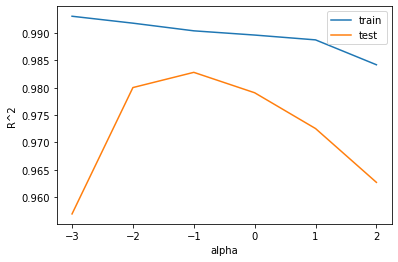

In [ ]:
# np.log10()을 사용해서 alpha_list 간격을 보기 좋게 바꿈
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = Ridge(alpha=0.1)
model.fit(train_scaled, y_train)

print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.9903815817570366
0.9827976465386926


#### 결론: 규제를 안 하면 과대적합, 너무 하면 과소적합, 제일 좋은 지점은 train과 test 차이가 제일 적게 나는 지점

### 라쏘 회귀
- |가중치| 를 벌칙으로 사용
  - 이를 선형 회귀가 아닌 다른 모델에 적용할 경우, `L1규제`라고 한다.

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()  # 하이퍼파라미터 "alpha"는 1이 디폴트, alpha를 크게하면 강도 ↑
model.fit(train_scaled, y_train)
print(model.score(train_scaled, y_train))

0.989789897208096


In [ ]:
print(model.score(test_scaled, y_test))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  # 이렇게 log 스케일(10의 배수)로 바꾸는 게 관례
for alpha in alpha_list:
    # 라쏘 모델 선언
    model = Lasso(alpha=alpha, max_iter=10000)

    # 라쏘 모델 훈련
    model.fit(train_scaled, y_train)

    # 훈련 점수와 테스트 점수 저장
    train_score.append(model.score(train_scaled, y_train))
    test_score.append(model.score(test_scaled, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


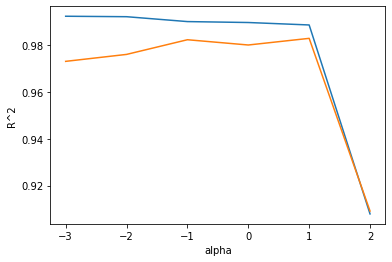

In [ ]:
# np.log10()을 사용해서 alpha_list 간격을 보기 좋게 바꿈
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
model = Lasso(alpha=10)
model.fit(train_scaled, y_train)

print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.9888067471131867
0.9824470598706695


- 라쏘 회귀 특징: 일부 특성을 아예 사용 안 할 수도 있다.
  - 가중치를 0으로 만들 수 있다. 이러면 해당 특성이 의미 없어짐
  - 이런 특징때문에 라쏘 모델을 `유용한 특성을 골라내는 용도`로도 사용할 수 있다.

In [ ]:
print(np.sum(model.coef_ == 0))  # 총 55개 특성 중 15개만 사용했음을 알 수 있다.

40


### 일반적으로 라쏘 회귀(L1)보다는 릿지 회귀(L2) 규제를 선호
  - 규제가 좀 더 효과적
